In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [2]:
df = pd.read_csv("../input/new-york-city-taxi-fare-prediction/train.csv",nrows=1000000)
df_test= pd.read_csv("../input/new-york-city-taxi-fare-prediction/test.csv")
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [4]:
df = df.dropna(how = 'any', axis = 'rows')
df_test = df_test.dropna(how = 'any', axis = 'rows')

In [5]:
df.shape

(999990, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                999990 non-null  object 
 1   fare_amount        999990 non-null  float64
 2   pickup_datetime    999990 non-null  object 
 3   pickup_longitude   999990 non-null  float64
 4   pickup_latitude    999990 non-null  float64
 5   dropoff_longitude  999990 non-null  float64
 6   dropoff_latitude   999990 non-null  float64
 7   passenger_count    999990 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 619.6+ KB


In [8]:
df['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [9]:
df = df.drop(df[df['fare_amount']<0].index, axis=0)


In [10]:
df['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [11]:
df = df.drop(df[df['passenger_count']>6].index, axis=0)
df_test = df_test.drop(df_test[df_test['passenger_count']>6].index, axis=0)

In [12]:
df.shape

(999951, 8)

In [13]:
df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

df_test['key'] = pd.to_datetime(df['key'])
df_test['pickup_datetime']  = pd.to_datetime(df_test['pickup_datetime'])

In [14]:
data = [df,df_test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.day_name()
    i['Hour'] = i['pickup_datetime'].dt.hour

In [15]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,Monday,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,Tuesday,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,Thursday,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,Saturday,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,Tuesday,7


Text(0, 0.5, 'Frequency')

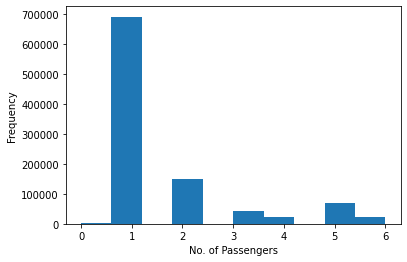

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['passenger_count'])
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

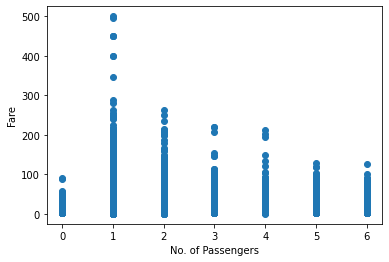

In [17]:
plt.figure()
plt.scatter(x=df['passenger_count'], y=df['fare_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

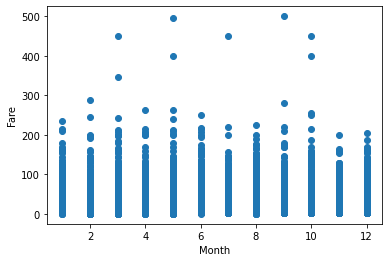

In [18]:
plt.figure()
plt.scatter(x=df['Month'], y=df['fare_amount'])
plt.xlabel('Month')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

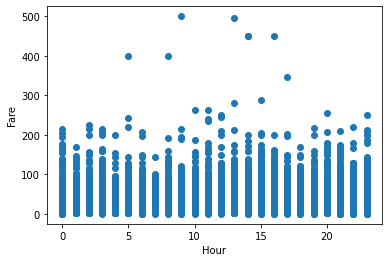

In [19]:
plt.figure()
plt.scatter(x=df['Hour'], y=df['fare_amount'])
plt.xlabel('Hour')
plt.ylabel('Fare')

In [20]:
df1 = pd.DataFrame(df, columns=['Hour', 'fare_amount'])
df1.groupby('Hour').mean()

,fare_amount
Hour,
0,11.741448
1,11.448878
2,11.487458
3,12.032729
4,13.569086
5,15.398358
6,12.210433
7,10.959879
8,10.904826


Text(0, 0.5, 'Frequency')

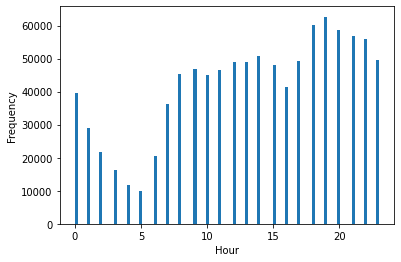

In [21]:
plt.figure()
plt.hist(df['Hour'],bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

# MAX FARE

In [22]:
from tabulate import tabulate
pd1 =  df[['Day of Week','fare_amount']].groupby('Day of Week').mean()

sorted_day = pd1.sort_values('fare_amount',ascending=False)

print("top 5")
print(sorted_day[0:5])

print()

print("bottom 5")
print(sorted_day[-5:])

print(tabulate(sorted_day[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

top 5
             fare_amount
Day of Week             
Sunday         11.640841
Thursday       11.510363
Friday         11.392653
Monday         11.392289
Wednesday      11.286615

bottom 5
             fare_amount
Day of Week             
Friday         11.392653
Monday         11.392289
Wednesday      11.286615
Tuesday        11.224302
Saturday       11.027370
╒═══════════════╤═══════════════╕
│ Day of Week   │   fare_amount │
╞═══════════════╪═══════════════╡
│ Sunday        │       11.6408 │
├───────────────┼───────────────┤
│ Thursday      │       11.5104 │
├───────────────┼───────────────┤
│ Friday        │       11.3927 │
├───────────────┼───────────────┤
│ Monday        │       11.3923 │
├───────────────┼───────────────┤
│ Wednesday     │       11.2866 │
╘═══════════════╧═══════════════╛


In [23]:
pd1 =  df[['Hour','fare_amount']].groupby('Hour').mean()

sorted_day = pd1.sort_values('fare_amount',ascending=False)

print("top 5")
print(tabulate(sorted_day[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

print()

print("bottom 5")
print(tabulate(sorted_day[-5:], headers = 'keys', tablefmt = 'fancy_grid'))


top 5
╒════════╤═══════════════╕
│   Hour │   fare_amount │
╞════════╪═══════════════╡
│      5 │       15.3984 │
├────────┼───────────────┤
│      4 │       13.5691 │
├────────┼───────────────┤
│      6 │       12.2104 │
├────────┼───────────────┤
│      3 │       12.0327 │
├────────┼───────────────┤
│     15 │       12.0194 │
╘════════╧═══════════════╛

bottom 5
╒════════╤═══════════════╕
│   Hour │   fare_amount │
╞════════╪═══════════════╡
│     10 │       10.9271 │
├────────┼───────────────┤
│      8 │       10.9048 │
├────────┼───────────────┤
│      9 │       10.8462 │
├────────┼───────────────┤
│     20 │       10.8094 │
├────────┼───────────────┤
│     19 │       10.5727 │
╘════════╧═══════════════╛


In [24]:
pd1 =  df[['Month','fare_amount']].groupby('Month').mean()

sorted_day = pd1.sort_values('fare_amount',ascending=False)

print("top 5")
print(tabulate(sorted_day[0:5], headers = 'keys', tablefmt = 'fancy_grid'))


print()

print("bottom 5")
print(tabulate(sorted_day[-5:], headers = 'keys', tablefmt = 'fancy_grid'))



top 5
╒═════════╤═══════════════╕
│   Month │   fare_amount │
╞═════════╪═══════════════╡
│       9 │       11.761  │
├─────────┼───────────────┤
│      10 │       11.6665 │
├─────────┼───────────────┤
│       5 │       11.645  │
├─────────┼───────────────┤
│      12 │       11.6359 │
├─────────┼───────────────┤
│      11 │       11.5614 │
╘═════════╧═══════════════╛

bottom 5
╒═════════╤═══════════════╕
│   Month │   fare_amount │
╞═════════╪═══════════════╡
│       8 │       11.2477 │
├─────────┼───────────────┤
│       3 │       11.1477 │
├─────────┼───────────────┤
│       7 │       11.1323 │
├─────────┼───────────────┤
│       2 │       10.8885 │
├─────────┼───────────────┤
│       1 │       10.7413 │
╘═════════╧═══════════════╛


# BUSIEST

In [25]:
pd1 = df.groupby(['Hour']).size().reset_index(name='counts')
sorted_day = pd1.sort_values('counts',ascending=False)

print("top 5")
print(tabulate(sorted_day[0:5], headers = 'keys', tablefmt = 'fancy_grid'))


print()

print("bottom 5")
print(tabulate(sorted_day[-5:], headers = 'keys', tablefmt = 'fancy_grid'))



top 5
╒════╤════════╤══════════╕
│    │   Hour │   counts │
╞════╪════════╪══════════╡
│ 19 │     19 │    62661 │
├────┼────────┼──────────┤
│ 18 │     18 │    60264 │
├────┼────────┼──────────┤
│ 20 │     20 │    58763 │
├────┼────────┼──────────┤
│ 21 │     21 │    56938 │
├────┼────────┼──────────┤
│ 22 │     22 │    55795 │
╘════╧════════╧══════════╛

bottom 5
╒════╤════════╤══════════╕
│    │   Hour │   counts │
╞════╪════════╪══════════╡
│  2 │      2 │    21872 │
├────┼────────┼──────────┤
│  6 │      6 │    20564 │
├────┼────────┼──────────┤
│  3 │      3 │    16133 │
├────┼────────┼──────────┤
│  4 │      4 │    11709 │
├────┼────────┼──────────┤
│  5 │      5 │     9815 │
╘════╧════════╧══════════╛


In [26]:
pd1 = df.groupby(['Month']).size().reset_index(name='counts')
sorted_day = pd1.sort_values('counts',ascending=False)

print("top 5")
print(tabulate(sorted_day[0:5], headers = 'keys', tablefmt = 'fancy_grid'))


print()

print("bottom 5")
print(tabulate(sorted_day[-5:], headers = 'keys', tablefmt = 'fancy_grid'))


top 5
╒════╤═════════╤══════════╕
│    │   Month │   counts │
╞════╪═════════╪══════════╡
│  4 │       5 │    93625 │
├────┼─────────┼──────────┤
│  2 │       3 │    93440 │
├────┼─────────┼──────────┤
│  3 │       4 │    92226 │
├────┼─────────┼──────────┤
│  5 │       6 │    89837 │
├────┼─────────┼──────────┤
│  0 │       1 │    89014 │
╘════╧═════════╧══════════╛

bottom 5
╒════╤═════════╤══════════╕
│    │   Month │   counts │
╞════╪═════════╪══════════╡
│ 11 │      12 │    76801 │
├────┼─────────┼──────────┤
│  6 │       7 │    76218 │
├────┼─────────┼──────────┤
│  8 │       9 │    76193 │
├────┼─────────┼──────────┤
│ 10 │      11 │    75599 │
├────┼─────────┼──────────┤
│  7 │       8 │    71557 │
╘════╧═════════╧══════════╛


In [27]:
pd1 = df.groupby(['Day of Week']).size().reset_index(name='counts')
sorted_day = pd1.sort_values('counts',ascending=False)

print("top 5")
print(tabulate(sorted_day[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

print()

print("bottom 5")
print(tabulate(sorted_day[-5:], headers = 'keys', tablefmt = 'fancy_grid'))

top 5
╒════╤═══════════════╤══════════╕
│    │ Day of Week   │   counts │
╞════╪═══════════════╪══════════╡
│  0 │ Friday        │   154238 │
├────┼───────────────┼──────────┤
│  2 │ Saturday      │   151273 │
├────┼───────────────┼──────────┤
│  4 │ Thursday      │   149660 │
├────┼───────────────┼──────────┤
│  6 │ Wednesday     │   144835 │
├────┼───────────────┼──────────┤
│  5 │ Tuesday       │   139980 │
╘════╧═══════════════╧══════════╛

bottom 5
╒════╤═══════════════╤══════════╕
│    │ Day of Week   │   counts │
╞════╪═══════════════╪══════════╡
│  4 │ Thursday      │   149660 │
├────┼───────────────┼──────────┤
│  6 │ Wednesday     │   144835 │
├────┼───────────────┼──────────┤
│  5 │ Tuesday       │   139980 │
├────┼───────────────┼──────────┤
│  3 │ Sunday        │   131292 │
├────┼───────────────┼──────────┤
│  1 │ Monday        │   128673 │
╘════╧═══════════════╧══════════╛


# kmeans pickup


In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_clusters=200,max_iter=100,random_state=42 )



In [29]:
a =  df[['pickup_longitude','pickup_latitude']]
type(a)

a.shape



(999951, 2)

In [30]:
y_kmeans = kmeans.fit_predict(a)
df['pickup_cluster'] = y_kmeans

In [31]:
centroids_pickup = kmeans.cluster_centers_


In [32]:
cen_x_pickup = [i[0] for i in centroids_pickup] 
cen_y_pickup = [i[1] for i in centroids_pickup]

In [33]:
df_cen = pd.DataFrame(list(zip(cen_x_pickup, cen_y_pickup)),
               columns =['long', 'lat'])

In [34]:
df_cen

,long,lat
0,-73.985449,40.768315
1,-73.980528,40.743721
2,-73.962149,40.772138
3,-73.958187,40.771045
4,-73.989685,40.735725
...,...,...
195,-73.978759,40.784894
196,-74.009429,40.718558
197,-73.952917,40.821412
198,-73.921458,40.766268


In [35]:
df_cen.insert(0, 'cluster', range(0, 0 + len(df_cen)))
df_cen

,cluster,long,lat
0,0,-73.985449,40.768315
1,1,-73.980528,40.743721
2,2,-73.962149,40.772138
3,3,-73.958187,40.771045
4,4,-73.989685,40.735725
...,...,...,...
195,195,-73.978759,40.784894
196,196,-74.009429,40.718558
197,197,-73.952917,40.821412
198,198,-73.921458,40.766268


In [36]:
df_cen.to_csv('centroid.csv', index=False)

In [37]:
#  for i in range__dir__(999952):
#         j = df.iloc[i]['pickup_cluster']
#         df['cen_x_pickup'] = cen_x_pickup[j]
#         df['cen_y_pickup'] = cen_y_pickup[j]

In [38]:
kmeans1 = KMeans(init="random",n_clusters=200,max_iter=100,random_state=42 )
a1 =  df[['dropoff_longitude','dropoff_latitude']]
df['dropoff_cluster'] = kmeans1.fit_predict(a1)

In [39]:
centroids_dropoff = kmeans1.cluster_centers_

In [40]:
cen_x_dropoff = [i[0] for i in centroids_dropoff] 
cen_y_dropoff = [i[1] for i in centroids_dropoff]

In [41]:
# for i in range(999952):
#         j = df['dropoff_cluster'][i]
#         df['cen_y_dropoff'] = cen_y_dropoff[j]
#         df['cen_x_dropoff'] = cen_x_dropoff[j]

In [42]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,pickup_cluster,dropoff_cluster
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,Monday,17,102,22
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,Tuesday,16,119,188
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,Thursday,0,166,118
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,Saturday,4,129,124
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,Tuesday,7,189,142


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999951 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                999951 non-null  datetime64[ns]     
 1   fare_amount        999951 non-null  float64            
 2   pickup_datetime    999951 non-null  datetime64[ns, UTC]
 3   pickup_longitude   999951 non-null  float64            
 4   pickup_latitude    999951 non-null  float64            
 5   dropoff_longitude  999951 non-null  float64            
 6   dropoff_latitude   999951 non-null  float64            
 7   passenger_count    999951 non-null  int64              
 8   Year               999951 non-null  int64              
 9   Month              999951 non-null  int64              
 10  Date               999951 non-null  int64              
 11  Day of Week        999951 non-null  object             
 12  Hour               999951 non-

# Busiest Area

In [44]:
pd1_count_area = df.groupby(['pickup_cluster']).size().reset_index(name='counts')
sorted_day = pd1_count_area.sort_values('counts',ascending=False)
print(pd1_count_area[120:122])
print("top 5")
print(tabulate(sorted_day[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

print()



print("bottom 5")
print(tabulate(sorted_day[-5:], headers = 'keys', tablefmt = 'fancy_grid'))

     pickup_cluster  counts
120             120    4978
121             121       2
top 5
╒═════╤══════════════════╤══════════╕
│     │   pickup_cluster │   counts │
╞═════╪══════════════════╪══════════╡
│  75 │               75 │    19464 │
├─────┼──────────────────┼──────────┤
│  43 │               43 │    18950 │
├─────┼──────────────────┼──────────┤
│ 170 │              170 │    15943 │
├─────┼──────────────────┼──────────┤
│  94 │               94 │    15447 │
├─────┼──────────────────┼──────────┤
│ 118 │              118 │    11586 │
╘═════╧══════════════════╧══════════╛

bottom 5
╒═════╤══════════════════╤══════════╕
│     │   pickup_cluster │   counts │
╞═════╪══════════════════╪══════════╡
│ 135 │              135 │        1 │
├─────┼──────────────────┼──────────┤
│  74 │               74 │        1 │
├─────┼──────────────────┼──────────┤
│ 109 │              109 │        1 │
├─────┼──────────────────┼──────────┤
│  72 │               72 │        1 │
├─────┼──────────────────┼

In [45]:
df = pd.merge(df,pd1_count_area,on='pickup_cluster',how='inner')
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,pickup_cluster,dropoff_cluster,counts
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,Monday,17,102,22,1595
1,2014-03-12 18:12:44.000000600,12.0,2014-03-12 18:12:44+00:00,-73.844904,40.736318,-73.844904,40.736318,1,2014,3,12,Wednesday,18,102,22,1595
2,2012-01-17 13:23:00.000000196,8.9,2012-01-17 13:23:00+00:00,-73.844280,40.721353,-73.810493,40.735507,5,2012,1,17,Tuesday,13,102,22,1595
3,2011-12-16 01:34:00.000000330,4.9,2011-12-16 01:34:00+00:00,-73.844307,40.721327,-73.859050,40.718952,5,2011,12,16,Friday,1,102,22,1595
4,2009-08-28 14:07:50.000000400,23.7,2009-08-28 14:07:50+00:00,-73.844472,40.721396,-73.790328,40.643789,1,2009,8,28,Friday,14,102,81,1595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999946,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00+00:00,-3377.680935,-113.019497,-554.918693,314.794180,1,2011,10,28,Friday,13,74,190,1
999947,2011-10-28 10:53:00.000000800,16.9,2011-10-28 10:53:00+00:00,-1452.988333,40.776000,-73.989487,40.740667,2,2011,10,28,Friday,10,174,185,1
999948,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00+00:00,2522.271325,2621.628430,-1718.117653,-2864.471003,1,2012,3,22,Thursday,21,72,50,1
999949,2012-01-21 10:19:00.000000124,7.7,2012-01-21 10:19:00+00:00,-90.239125,47.890090,-90.239125,47.890090,1,2012,1,21,Saturday,10,121,55,2


In [46]:
df.to_csv('file1.csv', index=False)


In [47]:
new_df = df[['pickup_cluster','counts']].copy()

# LINEAR REGRESSION

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_df)
scaler.transform(new_df)

array([[ 0.05603679, -1.47819405],
       [ 0.05603679, -1.47819405],
       [ 0.05603679, -1.47819405],
       ...,
       [-0.45172459, -1.9256108 ],
       [ 0.37761899, -1.92533011],
       [ 0.37761899, -1.92533011]])

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
x= new_df[['pickup_cluster']]
y = new_df['counts']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [53]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'copy_X':('True', 'False'), 'fit_intercept':('True', 'False')}

clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': ('True', 'False'),
                         'fit_intercept': ('True', 'False')})

In [54]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_copy_X',
 'param_fit_intercept',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [55]:
clf.best_params_

{'copy_X': 'True', 'fit_intercept': 'True'}

In [56]:
y_pred = model.predict(X_test)

In [57]:
mean_squared_error(y_test, y_pred)

12686876.144868191

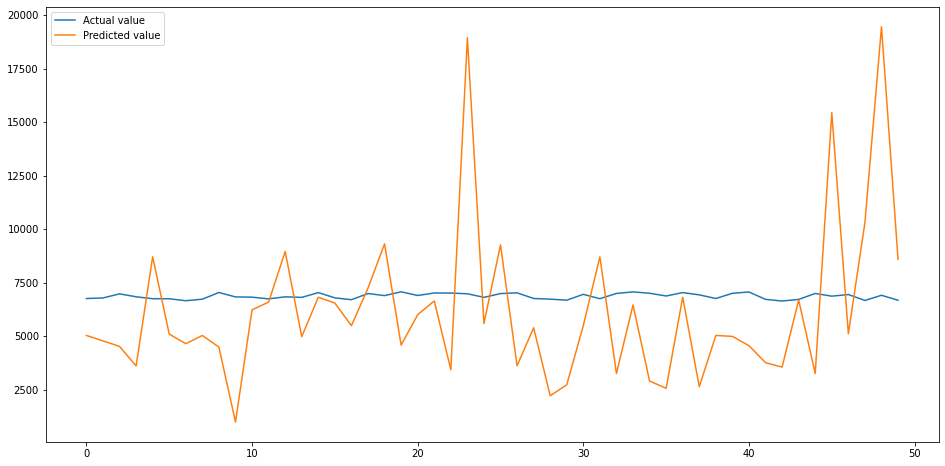

In [58]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [60]:
y_pred1 = regr.predict(X_test)

In [61]:
mean_squared_error(y_test, y_pred1)

11305099.871706054

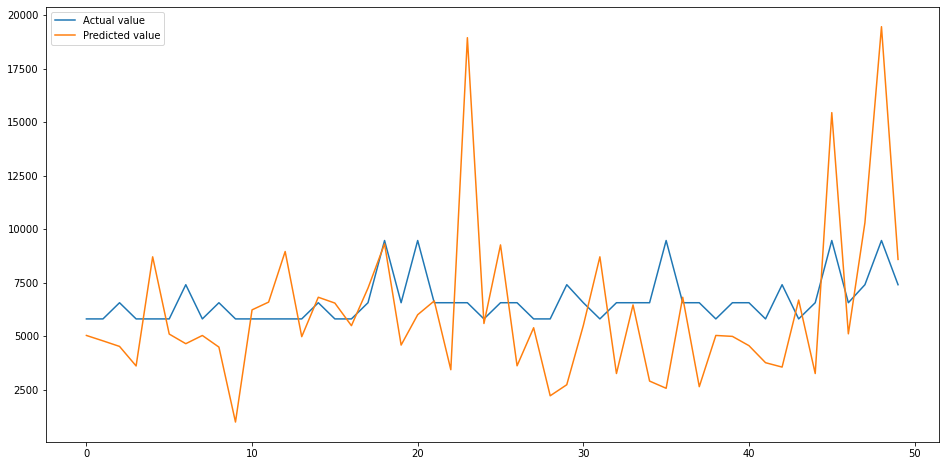

In [62]:
test = pd.DataFrame({'Predicted value':y_pred1, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [63]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    
}

In [64]:
# CV_rfc = GridSearchCV(estimator=regr, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [65]:
regr1=RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

In [66]:
y_pred4 = regr1.predict(X_test)

In [67]:
mean_squared_error(y_test, y_pred4)

740055.1322205449

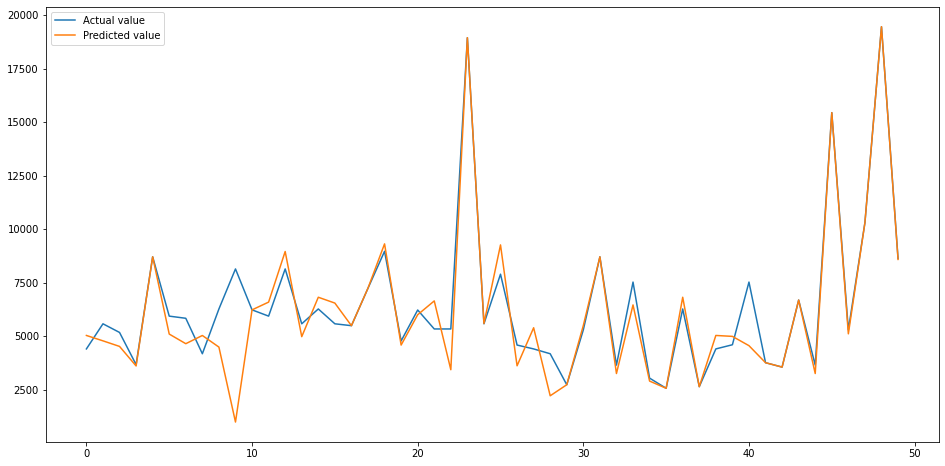

In [68]:
test = pd.DataFrame({'Predicted value':y_pred4, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

# XGB

In [69]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [70]:
y_pred2 = reg.predict(X_test)

In [71]:
mean_squared_error(y_test, y_pred2)

1572608.000475794

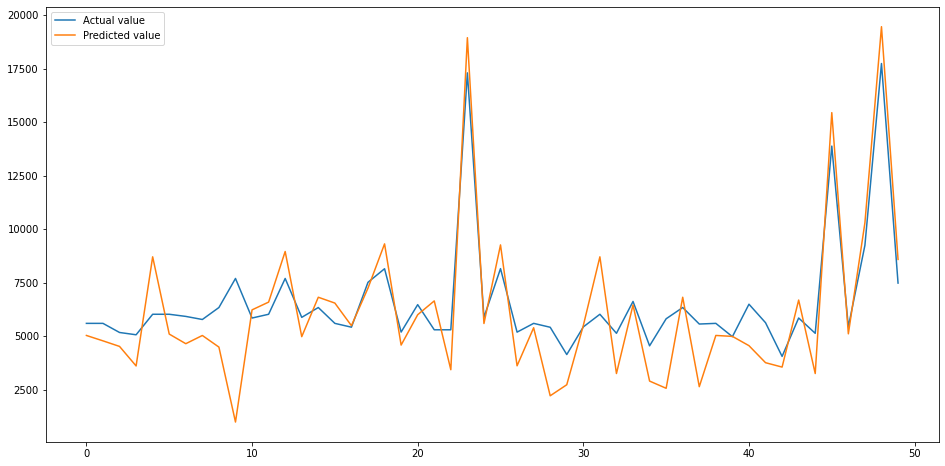

In [72]:
test = pd.DataFrame({'Predicted value':y_pred2, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [73]:
# parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.9, 0.5, 0.2, 0.1],
#                   'n_estimators' : [100,500,1000, 1500],
#                   'max_depth'    : [4,6,8,10]
#                  }

In [74]:
# grid_GBR = GridSearchCV(estimator=reg, param_grid = parameters, cv = 2, n_jobs=-1)
# grid_GBR.fit(X_train, y_train)

In [75]:
params= {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.1}

In [76]:
reg1 = ensemble.GradientBoostingRegressor(**params)
reg1.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=10, subsample=0.1)

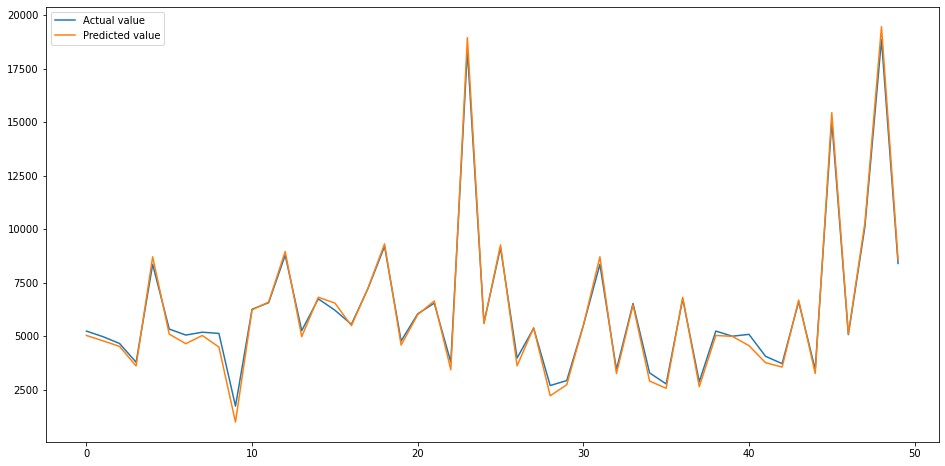

In [77]:
y_pred3 = reg1.predict(X_test)
test = pd.DataFrame({'Predicted value':y_pred3, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [78]:
mean_squared_error(y_test, y_pred3)

63502.44255169684

In [79]:
type(y_pred3)

numpy.ndarray

In [80]:
y_test_arr = y_test.to_numpy()

In [81]:
type(y_test_arr)

numpy.ndarray

In [82]:
a = pd.DataFrame(y_test_arr, columns=['Actual'])
b = pd.DataFrame(y_pred3, columns=['Predictions'])

result = pd.concat([b, a,],axis=1)
result['Diff'] = abs(result['Actual']-result['Predictions'])
result.head()


,Predictions,Actual,Diff
0,5238.559702,5034,204.559702
1,4976.969227,4782,194.969227
2,4658.793964,4522,136.793964
3,3780.815157,3609,171.815157
4,8356.245101,8709,352.754899


In [83]:
result.to_csv('file2.csv', index=False)


# TIMEWISE analysis


In [84]:
pd1 = df.groupby(['pickup_cluster','Hour']).size().reset_index(name='counts')
pd1.loc[pd1.groupby(["pickup_cluster"])["counts"].idxmax()]


,pickup_cluster,Hour,counts
19,0,19,389
43,1,19,303
56,2,8,368
90,3,18,404
115,4,19,623
...,...,...,...
4441,195,18,615
4469,196,22,647
4479,197,8,198
4502,198,7,240


In [85]:
pd1 = df.groupby(['pickup_cluster','Month']).size().reset_index(name='counts')
pd1.loc[pd1.groupby(["pickup_cluster"])["counts"].idxmax()]


,pickup_cluster,Month,counts
4,0,5,517
16,1,5,447
27,2,4,496
36,3,1,663
50,4,3,861
...,...,...,...
2216,195,1,807
2230,196,3,761
2244,197,5,361
2257,198,6,344


In [86]:
pd1 = df.groupby(['pickup_cluster','Date']).size().reset_index(name='counts')
pd1.loc[pd1.groupby(["pickup_cluster"])["counts"].idxmax()]

,pickup_cluster,Date,counts
12,0,13,203
52,1,22,179
70,2,9,197
105,3,13,248
146,4,23,350
...,...,...,...
5704,195,17,302
5731,196,13,301
5769,197,20,134
5796,198,16,140


In [87]:
pd1 = df.groupby(['pickup_cluster','Day of Week']).size().reset_index(name='counts')
pd1.loc[pd1.groupby(["pickup_cluster"])["counts"].idxmax()]

,pickup_cluster,Day of Week,counts
4,0,Thursday,868
9,1,Saturday,893
18,2,Thursday,872
21,3,Friday,1039
30,4,Saturday,1482
...,...,...,...
1310,195,Friday,1314
1321,196,Thursday,1318
1326,197,Saturday,602
1333,198,Saturday,720


DAY HOUR MONTH WISE

In [88]:
pd1 = df.groupby(['pickup_cluster','Hour']).size().reset_index(name='counts')
pd1= pd1.loc[pd1.groupby(["Hour"])["counts"].idxmax()]
pd1 = pd1.sort_values('counts',ascending=False)
print(tabulate(pd1[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

print(tabulate(pd1[-5:], headers = 'keys', tablefmt = 'fancy_grid'))

╒══════╤══════════════════╤════════╤══════════╕
│      │   pickup_cluster │   Hour │   counts │
╞══════╪══════════════════╪════════╪══════════╡
│ 1698 │               75 │     18 │     1287 │
├──────┼──────────────────┼────────┼──────────┤
│ 1702 │               75 │     22 │     1275 │
├──────┼──────────────────┼────────┼──────────┤
│ 1701 │               75 │     21 │     1241 │
├──────┼──────────────────┼────────┼──────────┤
│ 1699 │               75 │     19 │     1238 │
├──────┼──────────────────┼────────┼──────────┤
│ 1697 │               75 │     17 │     1216 │
╘══════╧══════════════════╧════════╧══════════╛
╒══════╤══════════════════╤════════╤══════════╕
│      │   pickup_cluster │   Hour │   counts │
╞══════╪══════════════════╪════════╪══════════╡
│ 3613 │              160 │      2 │      822 │
├──────┼──────────────────┼────────┼──────────┤
│ 2504 │              111 │      6 │      795 │
├──────┼──────────────────┼────────┼──────────┤
│ 4138 │              183 │      3 │    

In [89]:
pd1 = df.groupby(['pickup_cluster','Month']).size().reset_index(name='counts')
pd1 = pd1.loc[pd1.groupby(["Month"])["counts"].idxmax()]
pd1 = pd1.sort_values('counts',ascending=False)
print(tabulate(pd1[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

print(tabulate(pd1[-5:], headers = 'keys', tablefmt = 'fancy_grid'))

╒═════╤══════════════════╤═════════╤══════════╕
│     │   pickup_cluster │   Month │   counts │
╞═════╪══════════════════╪═════════╪══════════╡
│ 853 │               75 │       5 │     1932 │
├─────┼──────────────────┼─────────┼──────────┤
│ 854 │               75 │       6 │     1876 │
├─────┼──────────────────┼─────────┼──────────┤
│ 509 │               43 │       3 │     1789 │
├─────┼──────────────────┼─────────┼──────────┤
│ 852 │               75 │       4 │     1737 │
├─────┼──────────────────┼─────────┼──────────┤
│ 508 │               43 │       2 │     1611 │
╘═════╧══════════════════╧═════════╧══════════╛
╒═════╤══════════════════╤═════════╤══════════╕
│     │   pickup_cluster │   Month │   counts │
╞═════╪══════════════════╪═════════╪══════════╡
│ 857 │               75 │       9 │     1570 │
├─────┼──────────────────┼─────────┼──────────┤
│ 513 │               43 │       7 │     1521 │
├─────┼──────────────────┼─────────┼──────────┤
│ 860 │               75 │      12 │    

In [90]:
pd1 = df.groupby(['pickup_cluster','Day of Week']).size().reset_index(name='counts')
pd1 = pd1.loc[pd1.groupby(["Day of Week"])["counts"].idxmax()]
pd1 = pd1.sort_values('counts',ascending=False)
print(tabulate(pd1[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

╒═════╤══════════════════╤═══════════════╤══════════╕
│     │   pickup_cluster │ Day of Week   │   counts │
╞═════╪══════════════════╪═══════════════╪══════════╡
│ 503 │               75 │ Monday        │     3396 │
├─────┼──────────────────┼───────────────┼──────────┤
│ 506 │               75 │ Thursday      │     3003 │
├─────┼──────────────────┼───────────────┼──────────┤
│ 507 │               75 │ Tuesday       │     3003 │
├─────┼──────────────────┼───────────────┼──────────┤
│ 300 │               43 │ Friday        │     2898 │
├─────┼──────────────────┼───────────────┼──────────┤
│ 302 │               43 │ Saturday      │     2824 │
╘═════╧══════════════════╧═══════════════╧══════════╛


# Expensive AREA

In [91]:
pd1 =  df[['pickup_cluster','fare_amount']].groupby('pickup_cluster').mean()

sorted_day = pd1.sort_values('fare_amount',ascending=False)

print("top 5")
print(tabulate(sorted_day[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

print()

print("bottom 5")
print(tabulate(sorted_day[-5:], headers = 'keys', tablefmt = 'fancy_grid'))

top 5
╒══════════════════╤═══════════════╕
│   pickup_cluster │   fare_amount │
╞══════════════════╪═══════════════╡
│              161 │       56.0557 │
├──────────────────┼───────────────┤
│               83 │       48.5321 │
├──────────────────┼───────────────┤
│               94 │       43.228  │
├──────────────────┼───────────────┤
│               96 │       37.8463 │
├──────────────────┼───────────────┤
│              104 │       35.6725 │
╘══════════════════╧═══════════════╛

bottom 5
╒══════════════════╤═══════════════╕
│   pickup_cluster │   fare_amount │
╞══════════════════╪═══════════════╡
│               92 │       8.19526 │
├──────────────────┼───────────────┤
│              150 │       7.16667 │
├──────────────────┼───────────────┤
│               57 │       5.7     │
├──────────────────┼───────────────┤
│               74 │       5.3     │
├──────────────────┼───────────────┤
│              103 │       4.1     │
╘══════════════════╧═══════════════╛


In [92]:
pd1 =  df[['dropoff_cluster','fare_amount']].groupby('dropoff_cluster').mean()

sorted_day = pd1.sort_values('fare_amount',ascending=False)

print("top 5")
print(sorted_day[0:5])

print()

print("bottom 5")
print(sorted_day[-5:])

top 5
                 fare_amount
dropoff_cluster             
109                66.960282
77                 65.123152
95                 55.893858
81                 43.558977
72                 38.532711

bottom 5
                 fare_amount
dropoff_cluster             
26                  8.174560
70                  8.094087
155                 6.900000
190                 5.100000
48                  4.100000


In [93]:
pd1 = df.groupby(['pickup_cluster','Hour'])['fare_amount'].mean().reset_index()
pd1.loc[pd1.groupby(["pickup_cluster"])["fare_amount"].idxmax()]

,pickup_cluster,Hour,fare_amount
3,0,3,13.061194
28,1,4,12.105641
52,2,4,22.020556
77,3,5,13.300937
101,4,5,15.403448
...,...,...,...
4427,195,4,15.911250
4452,196,5,15.031154
4477,197,6,16.136606
4511,198,16,17.891882


In [94]:
pd1 = df.groupby(['pickup_cluster','Month'])['fare_amount'].mean().reset_index()
pd1.loc[pd1.groupby(["pickup_cluster"])["fare_amount"].idxmax()]

,pickup_cluster,Month,fare_amount
3,0,4,11.077074
21,1,10,9.433190
32,2,9,9.468182
44,3,9,10.450312
57,4,10,10.350562
...,...,...,...
2222,195,7,10.251545
2237,196,10,12.218781
2245,197,6,14.339212
2254,198,3,14.384037


In [95]:
pd1 = df.groupby(['pickup_cluster','Date'])['fare_amount'].mean().reset_index()
pd1.loc[pd1.groupby(["pickup_cluster"])["fare_amount"].idxmax()]

,pickup_cluster,Date,fare_amount
27,0,28,11.630000
39,1,9,10.062439
69,2,8,9.709301
108,3,16,10.175022
152,4,29,11.137314
...,...,...,...
5710,195,23,10.817727
5726,196,8,12.559025
5771,197,22,15.427008
5791,198,11,16.607422


In [96]:
pd1 = df.groupby(['pickup_cluster','Day of Week'])['fare_amount'].mean().reset_index()
pd1.loc[pd1.groupby(["pickup_cluster"])["fare_amount"].idxmax()]

,pickup_cluster,Day of Week,fare_amount
4,0,Thursday,11.023906
9,1,Saturday,9.275196
16,2,Saturday,9.200490
23,3,Saturday,9.710838
28,4,Friday,10.155515
...,...,...,...
1313,195,Sunday,10.179490
1321,196,Thursday,11.912929
1324,197,Friday,14.422519
1337,198,Wednesday,14.642482


HOUR DAY MONTH WISE

In [97]:
pd1 = df.groupby(['pickup_cluster','Month'])['fare_amount'].mean().reset_index()
pd1 = pd1.loc[pd1.groupby(["Month"])["fare_amount"].idxmax()]
pd1 = pd1.sort_values('fare_amount',ascending=False)
print(tabulate(pd1[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

╒══════╤══════════════════╤═════════╤═══════════════╕
│      │   pickup_cluster │   Month │   fare_amount │
╞══════╪══════════════════╪═════════╪═══════════════╡
│ 1826 │              161 │       7 │      110.762  │
├──────┼──────────────────┼─────────┼───────────────┤
│  948 │               83 │       4 │      101.883  │
├──────┼──────────────────┼─────────┼───────────────┤
│ 1824 │              161 │       5 │       83.5    │
├──────┼──────────────────┼─────────┼───────────────┤
│ 1829 │              161 │      10 │       77.166  │
├──────┼──────────────────┼─────────┼───────────────┤
│ 1821 │              161 │       2 │       76.6375 │
╘══════╧══════════════════╧═════════╧═══════════════╛


In [98]:
pd1 = df.groupby(['pickup_cluster','Hour'])['fare_amount'].mean().reset_index()
pd1 = pd1.loc[pd1.groupby(["Hour"])["fare_amount"].idxmax()]
pd1 = pd1.sort_values('fare_amount',ascending=False)
print(tabulate(pd1[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

╒══════╤══════════════════╤════════╤═══════════════╕
│      │   pickup_cluster │   Hour │   fare_amount │
╞══════╪══════════════════╪════════╪═══════════════╡
│ 1874 │               83 │      2 │       162.5   │
├──────┼──────────────────┼────────┼───────────────┤
│ 3749 │              165 │     22 │       130     │
├──────┼──────────────────┼────────┼───────────────┤
│ 3635 │              161 │      0 │       108.854 │
├──────┼──────────────────┼────────┼───────────────┤
│ 1889 │               83 │     17 │       103.217 │
├──────┼──────────────────┼────────┼───────────────┤
│ 3638 │              161 │      3 │       102.667 │
╘══════╧══════════════════╧════════╧═══════════════╛


In [99]:
pd1 = df.groupby(['pickup_cluster','Day of Week'])['fare_amount'].mean().reset_index()
pd1 = pd1.loc[pd1.groupby(["Day of Week"])["fare_amount"].idxmax()]
pd1 = pd1.sort_values('fare_amount',ascending=False)
print(tabulate(pd1[0:5], headers = 'keys', tablefmt = 'fancy_grid'))

╒══════╤══════════════════╤═══════════════╤═══════════════╕
│      │   pickup_cluster │ Day of Week   │   fare_amount │
╞══════╪══════════════════╪═══════════════╪═══════════════╡
│  560 │               83 │ Saturday      │       80.9142 │
├──────┼──────────────────┼───────────────┼───────────────┤
│  562 │               83 │ Thursday      │       79.7267 │
├──────┼──────────────────┼───────────────┼───────────────┤
│ 1079 │              161 │ Monday        │       73.5736 │
├──────┼──────────────────┼───────────────┼───────────────┤
│ 1084 │              161 │ Wednesday     │       68.0979 │
├──────┼──────────────────┼───────────────┼───────────────┤
│ 1083 │              161 │ Tuesday       │       62.3    │
╘══════╧══════════════════╧═══════════════╧═══════════════╛


# Distance

In [100]:
a = kmeans.cluster_centers_
b= kmeans1.cluster_centers_


In [101]:
from scipy.spatial import distance_matrix

dist_mat1 = distance_matrix(a,a,p=2)

In [102]:
dist_mat2 = distance_matrix(b,b,p=2)

In [103]:
dist_mat3 = distance_matrix(a,b,p=2)

In [104]:
dist_mat1

array([[0.        , 0.02508144, 0.02361087, ..., 0.06227017, 0.06402337,
        0.03098801],
       [0.02508144, 0.        , 0.03384226, ..., 0.08245153, 0.063227  ,
        0.03330023],
       [0.02361087, 0.03384226, 0.        , ..., 0.0501316 , 0.04111247,
        0.01054314],
       ...,
       [0.06227017, 0.08245153, 0.0501316 , ..., 0.        , 0.06348661,
        0.05673382],
       [0.06402337, 0.063227  , 0.04111247, ..., 0.06348661, 0.        ,
        0.03325033],
       [0.03098801, 0.03330023, 0.01054314, ..., 0.05673382, 0.03325033,
        0.        ]])

In [105]:
dist_mat2

array([[0.        , 0.04346744, 0.05747849, ..., 0.04128954, 0.07470323,
        0.02619253],
       [0.04346744, 0.        , 0.01991828, ..., 0.00223744, 0.0933472 ,
        0.03756751],
       [0.05747849, 0.01991828, 0.        , ..., 0.02165427, 0.08999858,
        0.05690105],
       ...,
       [0.04128954, 0.00223744, 0.02165427, ..., 0.        , 0.09241201,
        0.03553363],
       [0.07470323, 0.0933472 , 0.08999858, ..., 0.09241201, 0.        ,
        0.09975346],
       [0.02619253, 0.03756751, 0.05690105, ..., 0.03553363, 0.09975346,
        0.        ]])

In [106]:
dist_mat3

array([[0.04689678, 0.00868653, 0.0259848 , ..., 0.00916364, 0.10154612,
        0.03573833],
       [0.02347808, 0.02021572, 0.03470527, ..., 0.0181176 , 0.0804724 ,
        0.0266643 ],
       [0.05690022, 0.01795171, 0.00259012, ..., 0.01980568, 0.09173823,
        0.05524934],
       ...,
       [0.10592788, 0.06286642, 0.05041773, ..., 0.06510143, 0.13485083,
        0.09790865],
       [0.08027493, 0.05663476, 0.03854461, ..., 0.05774541, 0.07565489,
        0.0894618 ],
       [0.05462451, 0.02338482, 0.00838193, ..., 0.02453235, 0.08176729,
        0.05788741]])

In [107]:
dist_mat3.shape

(200, 200)

In [108]:
from scipy.spatial.distance import squareform

df_temp = pd.DataFrame({'cluster':range(200)})



pd_pickup = (pd.DataFrame(
    dist_mat1,
    columns = [df_temp.cluster],
    index = [df_temp.cluster]))

In [109]:
pd_pickup

cluster,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.025081,0.023611,0.027398,0.032864,0.023102,0.060685,0.068817,0.031407,662.723384,...,0.036158,0.022865,0.006147,0.025606,0.016545,0.017877,0.055234,0.062270,0.064023,0.030988
1,0.025081,0.000000,0.033842,0.035295,0.012156,0.027895,0.042473,0.050828,0.036007,662.728305,...,0.014369,0.013436,0.019478,0.004319,0.027208,0.041211,0.038320,0.082452,0.063227,0.033300
2,0.023611,0.033842,0.000000,0.004111,0.045651,0.007080,0.076035,0.084414,0.009050,662.746684,...,0.048174,0.040277,0.021928,0.031112,0.039894,0.020943,0.071457,0.050132,0.041112,0.010543
3,0.027398,0.035295,0.004111,0.000000,0.047324,0.007412,0.077732,0.086100,0.005076,662.750646,...,0.049660,0.042814,0.025228,0.032188,0.043496,0.024799,0.073353,0.050642,0.037038,0.007249
4,0.032864,0.012156,0.045651,0.047324,0.000000,0.039951,0.030413,0.038787,0.048160,662.719149,...,0.003377,0.011872,0.028426,0.015986,0.028457,0.050367,0.026164,0.093242,0.074751,0.045450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.017877,0.041211,0.020943,0.024799,0.050367,0.025590,0.078559,0.086675,0.029874,662.730075,...,0.053581,0.040740,0.022023,0.040558,0.031758,0.000000,0.073083,0.044737,0.060252,0.031429
196,0.055234,0.038320,0.071457,0.073353,0.026164,0.066021,0.006012,0.013605,0.074320,662.699405,...,0.024382,0.032513,0.052263,0.042051,0.044262,0.073083,0.000000,0.117356,0.100075,0.071609
197,0.062270,0.082452,0.050132,0.050642,0.093242,0.057163,0.122634,0.130878,0.053310,662.755919,...,0.096204,0.084844,0.065197,0.080461,0.076292,0.044737,0.117356,0.000000,0.063487,0.056734


In [110]:
s1=pd_pickup.idxmax()
s2=pd_pickup.max()

In [111]:
pd_pickup1 = pd.concat([s1,s2],axis=1)


In [112]:
pd_pickup1.nlargest(5,[1])

,0,1
cluster,,
72,"(103,)",6527.596847
103,"(72,)",6527.596847
74,"(72,)",6502.902118
109,"(72,)",6267.815214
135,"(74,)",5809.449290


In [113]:
keys = ['cluster1','cluster2','Distance']

In [114]:
print(tabulate(pd_pickup1.nlargest(5,[1]), headers = 'keys', tablefmt = 'fancy_grid'))

╒════════╤════════╤═════════╕
│        │ 0      │       1 │
╞════════╪════════╪═════════╡
│ (72,)  │ (103,) │ 6527.6  │
├────────┼────────┼─────────┤
│ (103,) │ (72,)  │ 6527.6  │
├────────┼────────┼─────────┤
│ (74,)  │ (72,)  │ 6502.9  │
├────────┼────────┼─────────┤
│ (109,) │ (72,)  │ 6267.82 │
├────────┼────────┼─────────┤
│ (135,) │ (74,)  │ 5809.45 │
╘════════╧════════╧═════════╛


# Time

MODEL

In [115]:
# x_train = df.iloc[:,df.columns!='fare_amount']
# y_train = df['fare_amount'].values
# x_test = df_test

In [116]:
# x_train.shape

In [117]:
# x_train = x_train.drop(['key','pickup_datetime'], axis = 1)
# x_test = x_test.drop(['key','pickup_datetime'], axis = 1)

In [118]:
# x_train.info()

In [119]:
# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(x_train, y_train)

# reg_pred = reg.predict(x_test)

In [120]:
# submission = pd.read_csv('../input/new-york-city-taxi-fare-prediction/sample_submission.csv')
# submission['fare_amount'] = reg_pred
# submission.to_csv('submission_1.csv', index=False)
# submission.head(20)

In [121]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(x_train, y_train)
# rf_predict = rf.predict(x_test)

In [122]:
# submission = pd.read_csv('../input/new-york-city-taxi-fare-prediction/sample_submission.csv')
# submission['fare_amount'] = rf_predict
# submission.to_csv('submission_2.csv', index=False)
# submission.head(20)
